In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("ggplot")

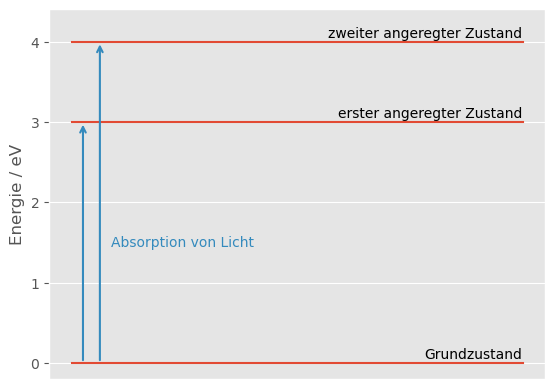

In [2]:
plt.plot([0.1, 0.9], [0.0, 0.0], color="C0")
plt.plot([0.1, 0.9], [3.0, 3.0], color="C0")
plt.plot([0.1, 0.9], [4.0, 4.0], color="C0")
plt.text(0.9, 0.02, "Grundzustand", ha="right", va="bottom")
plt.text(0.9, 3.02, "erster angeregter Zustand", ha="right", va="bottom")
plt.text(0.9, 4.02, "zweiter angeregter Zustand", ha="right", va="bottom")
plt.annotate(
    "",
    xy=(0.12, 3.0),
    xytext=(0.12, 0.0),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color="C1"),
    annotation_clip=False,
)
plt.annotate(
    "",
    xy=(0.15, 4.0),
    xytext=(0.15, 0.0),
    arrowprops=dict(arrowstyle="->", linewidth=1.5, color="C1"),
    annotation_clip=False,
)
plt.text(0.17, 1.5, "Absorption von Licht", ha="left", va="center", color="C1")
plt.ylim(-0.2, 4.4)
plt.xticks([])
plt.ylabel(r"Energie / eV")
plt.savefig("jablonski.png", dpi=300)
plt.show()

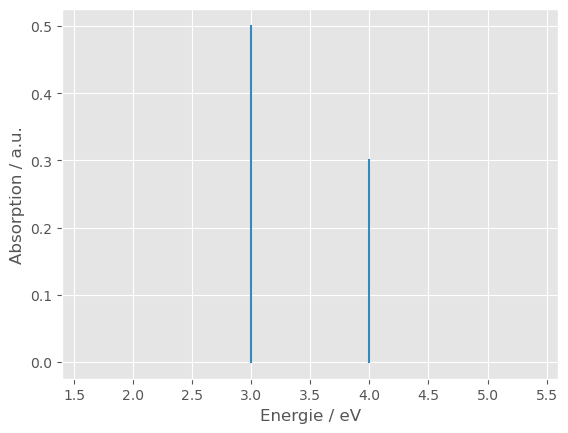

In [3]:
plt.plot([3.0, 3.0], [0.0, 0.5], color="C1")
plt.plot([4.0, 4.0], [0.0, 0.3], color="C1")
plt.xlim(1.4, 5.6)
plt.xlabel(r"Energie / eV")
plt.ylabel(r"Absorption / a.u.")
plt.savefig("line-spectrum.png", dpi=300)
plt.show()

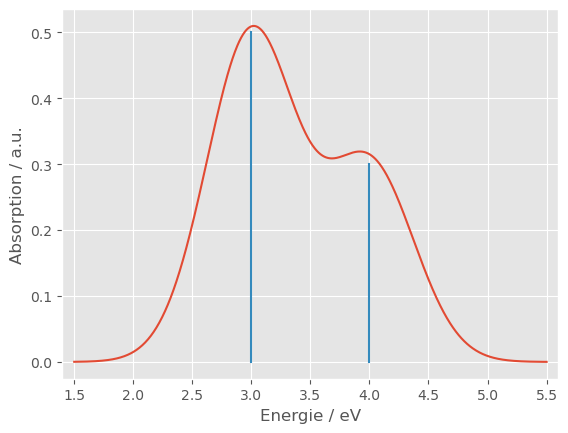

In [4]:
x = np.linspace(1.5, 5.5, 1000)
a = 0.5 * np.exp(-(3.5 * (x - 3.0) ** 2)) + 0.3 * np.exp(-(3.5 * (x - 4.0) ** 2))

plt.plot([3.0, 3.0], [0.0, 0.5], color="C1")
plt.plot([4.0, 4.0], [0.0, 0.3], color="C1")
plt.plot(x, a)
plt.xlim(1.4, 5.6)
plt.xlabel(r"Energie / eV")
plt.ylabel(r"Absorption / a.u.")
plt.savefig("uvvis-spectrum.png", dpi=300)
plt.show()

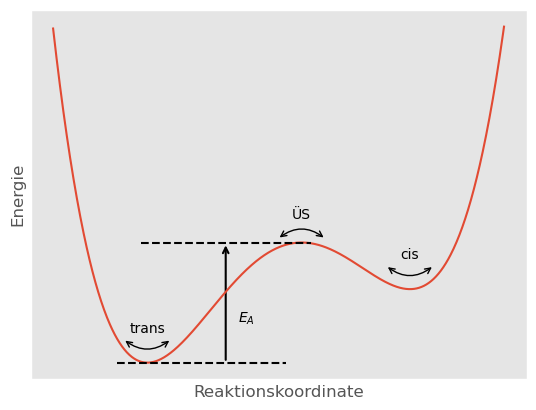

In [7]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1.0, 1.0, 1000)
y0 = 2.7 * x**4 - 1.6 * x**2 + 0.2 * x
y = y0 - np.min(y0)

mask = y <= 1.0

plt.plot(x[mask], y[mask])

# find the two minima positions
from scipy.signal import argrelextrema

# indices of local minima
mins = argrelextrema(y, np.less)[0]
min_positions = [(x[i], y[i]) for i in mins]

# Pick the two lowest ones (just in case there are small numerical bumps)
min_positions = sorted(min_positions, key=lambda t: t[1])[:2]

# add a small curved double-headed arrow at each

xrange = x.max() - x.min()
span = 0.1 * xrange  # 15% of total width

for (xm, ym), conf in zip(min_positions, ["trans", "cis"]):
    arrow = patches.FancyArrowPatch(
        (xm - span / 2, ym + 0.07),
        (xm + span / 2, ym + 0.07),
        arrowstyle="<->",
        connectionstyle="arc3,rad=0.4",
        linewidth=1.0,
        edgecolor="black",
        mutation_scale=10,
    )
    plt.gca().add_patch(arrow)
    plt.text(xm, ym + 0.08, conf, ha="center", va="bottom")


# indices of local maxima
max_indices = argrelextrema(y, np.greater)[0]
# pick the one with the highest value
imax = max_indices[np.argmax(y[max_indices])]
x_ts, y_ts = x[imax], y[imax]

arrow_ts = patches.FancyArrowPatch(
    (x_ts - span / 2, y_ts + 0.01),
    (x_ts + span / 2, y_ts + 0.01),
    arrowstyle="<->",
    connectionstyle="arc3,rad=-0.4",
    linewidth=1.0,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_ts)
plt.text(x_ts, y_ts + 0.06, "ÜS", ha="center", va="bottom")

plt.plot([-0.7, 0.0], [0.0, 0.0], color="black", ls="--")
plt.plot([-0.6, 0.1], [y_ts, y_ts], color="black", ls="--")
arrow_vert = patches.FancyArrowPatch(
    (-0.25, 0.0),
    (-0.25, y_ts),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)
plt.text(-0.2, 0.3 * y_ts, "$E_A$", ha="left", va="bottom")

plt.xticks([])
plt.yticks([])
plt.xlabel("Reaktionskoordinate")
plt.ylabel("Energie")
plt.savefig("profile.png", dpi=300)
plt.show()

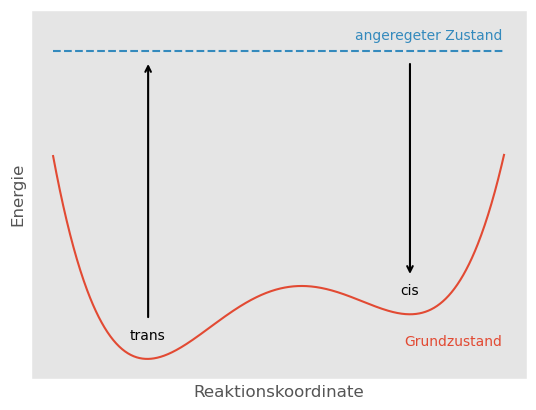

In [6]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1.0, 1.0, 1000)
y0 = 2.7 * x**4 - 1.6 * x**2 + 0.2 * x
y = y0 - np.min(y0)

mask = y <= 1.0

plt.plot(x[mask], y[mask])

# find the two minima positions
from scipy.signal import argrelextrema

# indices of local minima
mins = argrelextrema(y, np.less)[0]
min_positions = [(x[i], y[i]) for i in mins]

# Pick the two lowest ones (just in case there are small numerical bumps)
min_positions = sorted(min_positions, key=lambda t: t[1])[:2]

# add a small curved double-headed arrow at each

xrange = x.max() - x.min()
span = 0.1 * xrange  # 15% of total width

for (xm, ym), conf in zip(min_positions, ["trans", "cis"]):
    plt.text(xm, ym + 0.08, conf, ha="center", va="bottom")


plt.plot([x[mask].min(), x[mask].max()], [1.5, 1.5], ls="--")
plt.text(0.89, 1.54, "angeregeter Zustand", ha="right", va="bottom", color="C1")
plt.text(0.89, 0.05, "Grundzustand", ha="right", va="bottom", color="C0")

arrow_vert = patches.FancyArrowPatch(
    (-0.57, 0.19),
    (-0.57, 1.45),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)

arrow_vert = patches.FancyArrowPatch(
    (0.51, 1.45),
    (0.51, 0.4),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)

plt.xticks([])
plt.yticks([])
plt.xlabel("Reaktionskoordinate")
plt.ylabel("Energie")
plt.ylim(-0.1, 1.7)
plt.savefig("photoswitch-mechanism.png", dpi=300)
plt.show()

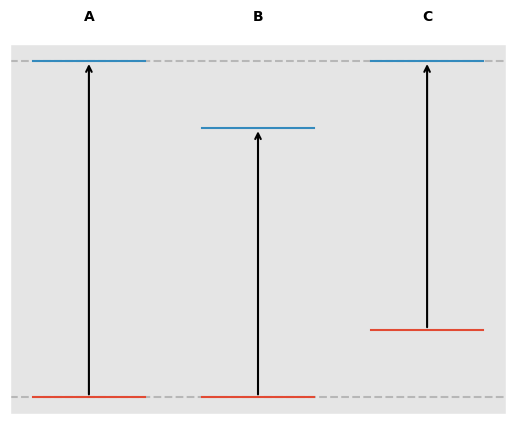

In [58]:
w = 1.0
d = 0.5

plt.axhline(0.0, color="black", alpha=0.2, ls="--")
plt.axhline(1.0, color="black", alpha=0.2, ls="--")

plt.plot([0, w], [0, 0], color="C0")
plt.plot([0, w], [1, 1], color="C1")
arrow_vert = patches.FancyArrowPatch(
    (0.5 * w, 0),
    (0.5 * w, 1),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)
plt.text(0.5 * w, 1.12, "A", weight="bold", ha="center")

plt.plot([w + d, 2 * w + d], [0, 0], color="C0")
plt.plot([w + d, 2 * w + d], [0.8, 0.8], color="C1")
arrow_vert = patches.FancyArrowPatch(
    (1.5 * w + d, 0),
    (1.5 * w + d, 0.8),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)
plt.text(1.5 * w + d, 1.12, "B", weight="bold", ha="center")

plt.plot([2 * w + 2 * d, 3 * w + 2 * d], [0.2, 0.2], color="C0")
plt.plot([2 * w + 2 * d, 3 * w + 2 * d], [1.0, 1.0], color="C1")
arrow_vert = patches.FancyArrowPatch(
    (2.5 * w + 2 * d, 0.2),
    (2.5 * w + 2 * d, 1.0),
    arrowstyle="->",
    connectionstyle="arc3,rad=0",
    linewidth=1.5,
    edgecolor="black",
    mutation_scale=10,
)
plt.gca().add_patch(arrow_vert)
plt.text(2.5 * w + 2 * d, 1.12, "C", weight="bold", ha="center")


# plt.plot([3 * w + 3 * d, 4 * w + 3 * d], [0.0, 0.0], color="C0")
# plt.plot([3 * w + 3 * d, 4 * w + 3 * d], [1.2, 1.2], color="C1")
# arrow_vert = patches.FancyArrowPatch(
#     (3.5 * w + 3 * d, 0.0),
#     (3.5 * w + 3 * d, 1.2),
#     arrowstyle="->",
#     connectionstyle="arc3,rad=0",
#     linewidth=1.5,
#     edgecolor="black",
#     mutation_scale=10,
# )
# plt.gca().add_patch(arrow_vert)
# plt.text(3.5 * w + 3 * d, 1.32, "C.1", weight="bold", ha="center")


# plt.plot([4 * w + 4 * d, 5 * w + 4 * d], [-0.2, -0.2], color="C0")
# plt.plot([4 * w + 4 * d, 5 * w + 4 * d], [1.0, 1.0], color="C1")
# arrow_vert = patches.FancyArrowPatch(
#     (4.5 * w + 4 * d, -0.2),
#     (4.5 * w + 4 * d, 1.0),
#     arrowstyle="->",
#     connectionstyle="arc3,rad=0",
#     linewidth=1.5,
#     edgecolor="black",
#     mutation_scale=10,
# )
# plt.gca().add_patch(arrow_vert)
# plt.text(4.5 * w + 4 * d, 1.32, "C.2", weight="bold", ha="center")

plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.savefig("substituent-effects.png", dpi=300)
plt.show()